Topic:        Challenge Set 3
<br>Subject:      Pandas
<br>Date:         01/28/2016
<br>Name:         Hasan Haq

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
% matplotlib inline

In [4]:
df = pd.read_csv('data/2013_movies.csv')

In [73]:
df['ReleaseDate'] = df['ReleaseDate'].map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

TypeError: strptime() argument 1 must be string, not Timestamp

**Challenge 1**

Plot domestic total gross over time.

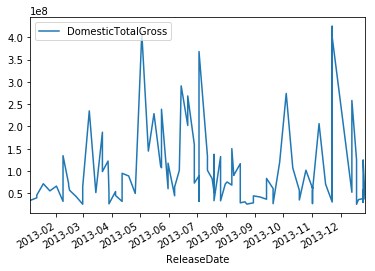

In [78]:
df.plot('ReleaseDate', 'DomesticTotalGross')

**Challenge 2**

Plot runtime vs. domestic total gross.

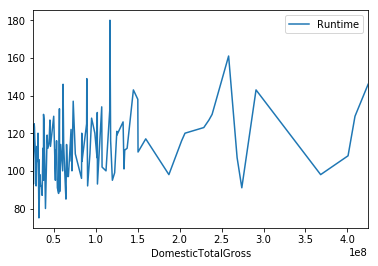

In [76]:
df.plot('DomesticTotalGross', 'Runtime').invert_xaxis();

**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [32]:
df.groupby('Rating').mean().ix[:,1:]

,DomesticTotalGross,Runtime
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

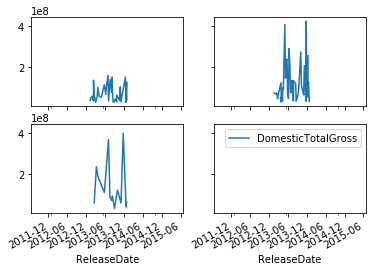

In [108]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

df[df['Rating'] == 'R'].plot('ReleaseDate', 'DomesticTotalGross', ax=axes[0,0], legend=False)

# plt.subplot(2,1,2)
df[df['Rating'] == 'PG-13'].plot('ReleaseDate', 'DomesticTotalGross', ax=axes[0,1], legend=False)

# plt.subplot(2,2,3)
df[df['Rating'] == 'PG'].plot('ReleaseDate', 'DomesticTotalGross', ax=axes[1,0], legend=False)

# plt.subplot(2,2,4)
df[df['Rating'] == 'G'].plot('ReleaseDate', 'DomesticTotalGross', ax=axes[1,1]);

**Challenge 5**

What director in your dataset has the highest gross per movie?

In [51]:
df.groupby('Director').mean().sort_values('DomesticTotalGross', ascending=False).iloc[0]

Budget                130000000.0
DomesticTotalGross    424668047.0
Runtime                     146.0
Name: Francis Lawrence, dtype: float64

**Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."

In [115]:
df['Month'] = [x.month for x in df['ReleaseDate']]

In [152]:
df_grp.sem()

,Budget,Director,DomesticTotalGross,Rating,ReleaseDate,Runtime,Title
Month,,,,,,,
1,1.374526e+07,NaN,6.555914e+06,NaN,NaN,5.617829,NaN
2,1.165762e+07,NaN,1.240927e+07,NaN,NaN,3.654277,NaN
3,2.802992e+07,NaN,2.441314e+07,NaN,NaN,4.414133,NaN
4,1.674996e+07,NaN,1.032911e+07,NaN,NaN,8.328332,NaN
5,1.615377e+07,NaN,3.951859e+07,NaN,NaN,5.705378,NaN
6,3.283105e+07,NaN,3.365826e+07,NaN,NaN,6.411311,NaN
7,1.798286e+07,NaN,2.638732e+07,NaN,NaN,5.670843,NaN
8,1.032736e+07,NaN,1.245915e+07,NaN,NaN,3.450476,NaN
9,9.676145e+06,NaN,1.421654e+07,NaN,NaN,7.149204,NaN


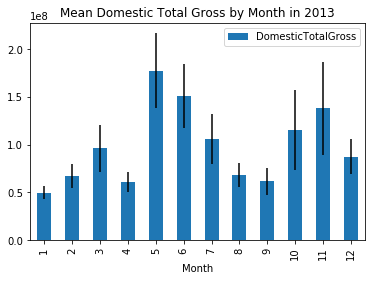

In [154]:
# df.plot(x='Month', y='DomesticTotalGross', kind='bar')

df_grp = df.groupby('Month')
errors = df_grp['DomesticTotalGross'].sem()
title = "Mean Domestic Total Gross by Month in 2013"
# errors = df_grp('DomesticTotalGross')
df_grp.mean().plot(y = 'DomesticTotalGross', kind='bar', yerr=errors, title = title);